In [1]:
#CCD lab analysis

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.mlab as mlab

In [2]:
#read noise, for 0.1s exposures
#1.
exp1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_1.FIT')[0].data
exp2 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_2.FIT')[0].data
exp3 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_3.FIT')[0].data
exp4 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_4.FIT')[0].data
exp5 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_5.FIT')[0].data
exp6 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_6.FIT')[0].data
exp7 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_7.FIT')[0].data
exp8 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_8.FIT')[0].data
exp9 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF01_9.FIT')[0].data

In [3]:
exp_array = np.empty([exp1.shape[0], exp1.shape[1], 9])

exp_list = [exp1, exp2, exp3, exp4, exp5, exp6, exp7, exp8, exp9]

In [4]:
#2.
for i in range(0, 9):
    exp_array[:,:,i] = exp_list[i][:,:] #this is an array of the dark exposures 


In [5]:
exp_array.shape

(1020, 1530, 9)

In [6]:
RMS_array = np.std(exp_array, axis = 2) #pixel wise

RMS_mean = np.mean(RMS_array) #number - described the pixel wise RMS
RMS_med = np.median(RMS_array)
RMS_rms = np.std(RMS_array)
RMS_aveuncertainty = RMS_rms / np.sqrt(exp1.shape[0]*exp1.shape[1])

In [7]:
RMS_array.shape

(1020, 1530)

In [8]:
RMS_mean, RMS_med, RMS_rms, RMS_aveuncertainty

(10.017866332555974,
 9.88576729757121,
 2.584877883504436,
 0.0020691607392128125)

In [9]:
"""

Mean of RMS_array (or median, depending on distribution shape) is the average read noise of the CCD
RMS of the RMS array is the statistical spread in the average read noise
RMS of the RMS_array divided by number of pixels is the uncertainty in the average read noise

"""

'\n\nMean of RMS_array (or median, depending on distribution shape) is the average read noise of the CCD\nRMS of the RMS array is the statistical spread in the average read noise\nRMS of the RMS_array divided by number of pixels is the uncertainty in the average read noise\n\n'

Text(0,0.5,'Y')

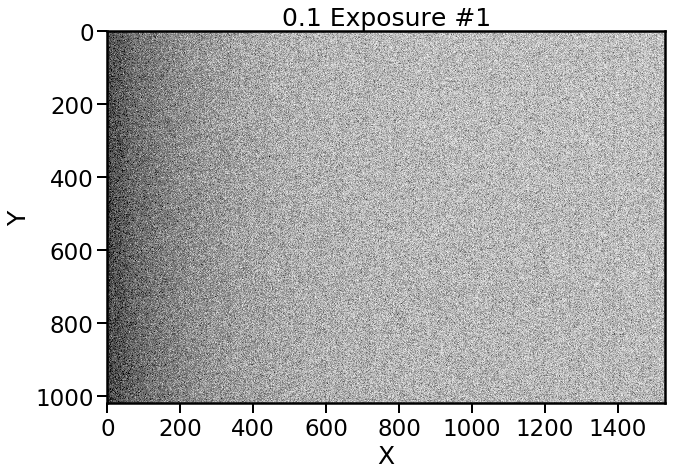

In [10]:
#explore exposures a bit
plt.figure(figsize=(10, 10))
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')

norm1 = matplotlib.colors.Normalize(vmin=min(exp1[0]), vmax=max(exp1[0]))
plt.imshow(exp1, norm=norm1, cmap='Greys')
plt.title('0.1 Exposure #1', fontsize=25)
plt.xlabel('X', fontsize=25)
plt.ylabel('Y', fontsize=25)

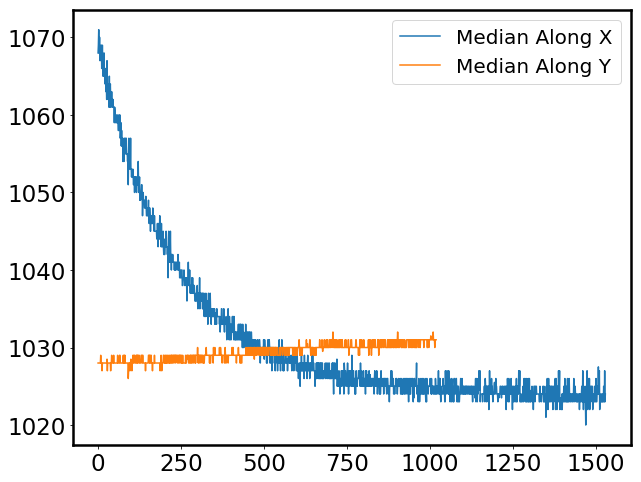

In [11]:
plt.figure(figsize=(10, 8))

x = np.median(exp1, axis=0)
y = np.median(exp1, axis=1)

plt.plot(x, label='Median Along X')
plt.plot(y, label='Median Along Y')
plt.legend(loc='upper right', fontsize=20)

Text(0.5,0,'RMS Distribution')

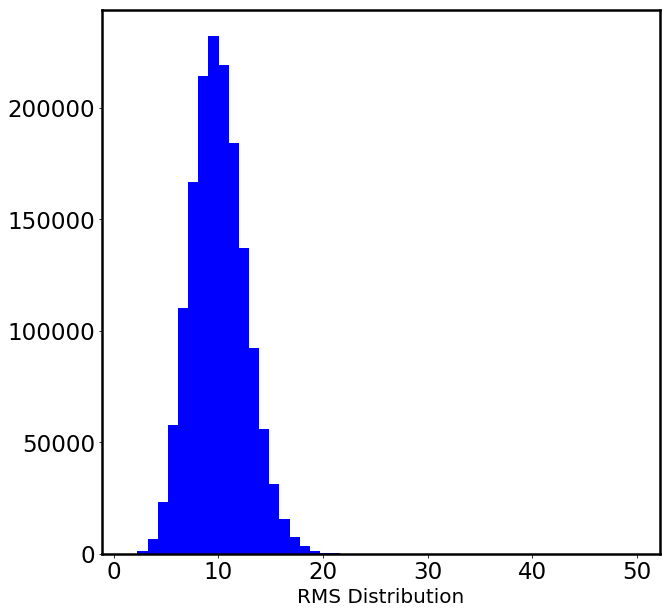

In [12]:
#distribution of the rms of the 'RMS' array as referred to in the lab write up (called exp_array in my code)
plt.figure(figsize=(10, 10))

plt.hist(np.ravel(RMS_array), 50, color='blue')
#plt.yscale('log')

plt.xlabel('RMS Distribution', fontsize=20)


Text(0,0.5,'N')

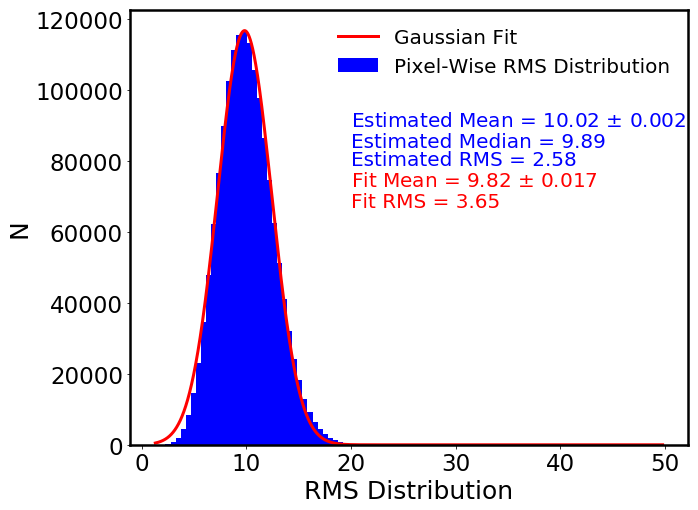

In [13]:
#fit Gaussian to the exp_array distribution
#normalized histogram to form a probability density, i.e., the area (or integral) under the histogram will sum to 1
from scipy.optimize import curve_fit
plt.figure(figsize=(10, 8))

distr = np.ravel(RMS_array)

def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

bin_heights, bin_borders, _ = plt.hist(distr, bins=100, color='blue', label='Pixel-Wise RMS Distribution')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[10., 110000, 5.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), color='red', lw = 3, label='Gaussian Fit')
plt.legend(fontsize=20, frameon=False)


#plt.yscale('log')

plt.annotate('Estimated Mean = 10.02 $\pm$ 0.002', xy=(20, 90000), fontsize=20, color='blue')
plt.annotate('Estimated Median = 9.89 ', xy=(20, 84000), fontsize=20, color='blue')
plt.annotate('Estimated RMS = 2.58 ', xy=(20, 79000), fontsize=20, color='blue')
plt.annotate('Fit Mean = 9.82 $\pm$ 0.017 ', xy=(20, 73000), fontsize=20, color='red')
plt.annotate('Fit RMS = 3.65 ', xy=(20, 67000), fontsize=20, color='red')

plt.xlabel('RMS Distribution', fontsize=25)
plt.ylabel('N', fontsize=25)

In [14]:
#of gaussian fit
mean = popt[0]
sigma = popt[2]

In [15]:
np.sqrt(np.diag(pcov))[2]

0.024218183655257505

In [16]:
mean, sigma

(9.817856967512961, 3.6541801640583884)

In [17]:
np.mean(distr), np.std(distr)

(10.017866332555974, 2.584877883504436)

There is a difference between fit mean/sigma and actual mean/sigma. Not sure why? Gets better with more bins...

In [18]:
#5.
#import the longer exposures

#1s
exp1s_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF1_1.FIT')[0].data
exp1s_2 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF1_3.FIT')[0].data
exp1s_3 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF1_3.FIT')[0].data


#10s
exp10s_1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF10_1.FIT')[0].data
exp10s_2 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF10_3.FIT')[0].data
exp10s_3 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF10_3.FIT')[0].data

In [19]:
exp1_array = np.empty([exp1.shape[0], exp1.shape[1], 3])
exp10_array = np.empty([exp1.shape[0], exp1.shape[1], 3])

exp1_list = [exp1s_1, exp1s_2, exp1s_3]
exp10_list = [exp10s_1, exp10s_2, exp10s_3]

for i in range(0, 3):
    exp1_array[:,:,i] = exp1_list[i][:,:] 
    exp10_array[:,:,i] = exp10_list[i][:,:]

 ...]

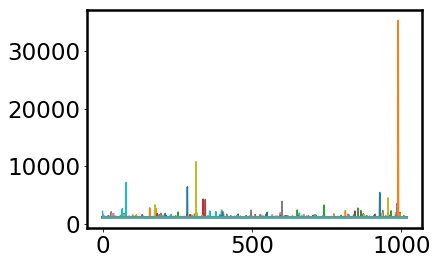

In [25]:
plt.plot(np.median(exp10_array, axis=2)) #check that I load the arrays correctly bc I did it wrong last time (:

#ALSO shows hot pixel around position 1000

In [20]:
RMS1_array = np.std(exp1_array, axis = 2) #pixel wise
RMS1_mean = np.mean(RMS1_array) #number - described the pixel wise RMS
RMS1_med = np.median(RMS1_array)
RMS1_rms = np.std(RMS1_array)
RMS1_aveuncertainty = RMS1_rms / np.sqrt(exp1.shape[0]*exp1.shape[1])

RMS10_array = np.std(exp10_array, axis = 2) #pixel wise
RMS10_mean = np.mean(RMS10_array) #number - described the pixel wise RMS
RMS10_med = np.median(RMS10_array)
RMS10_rms = np.std(RMS10_array)
RMS10_aveuncertainty = RMS10_rms / np.sqrt(exp1.shape[0]*exp1.shape[1])

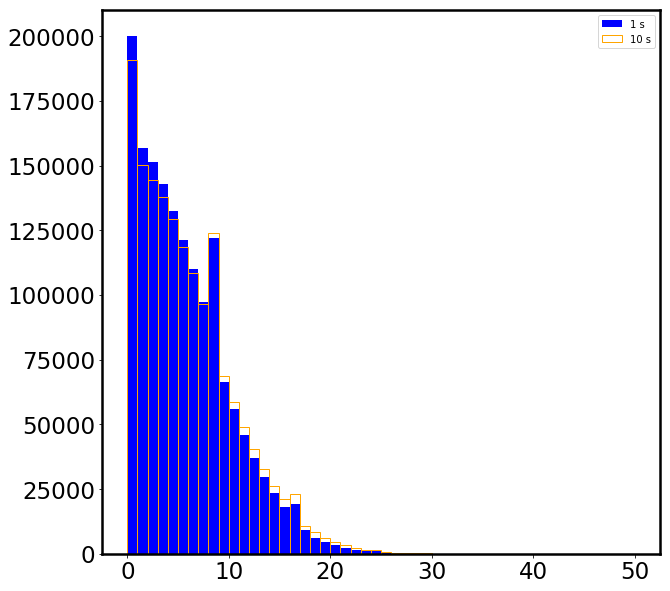

In [21]:
#distribution of 'RMS' arrays for the longer exposures
plt.figure(figsize=(10, 10))


plt.hist(np.ravel(RMS1_array), range=(0, 50), bins = 50, color='blue', label='1 s')
plt.hist(np.ravel(RMS10_array), bins = 50, range=(0, 50),fill=False, edgecolor='orange',label='10 s')

#plt.yscale('log')
plt.legend(loc='upper right')

(-5, 15)

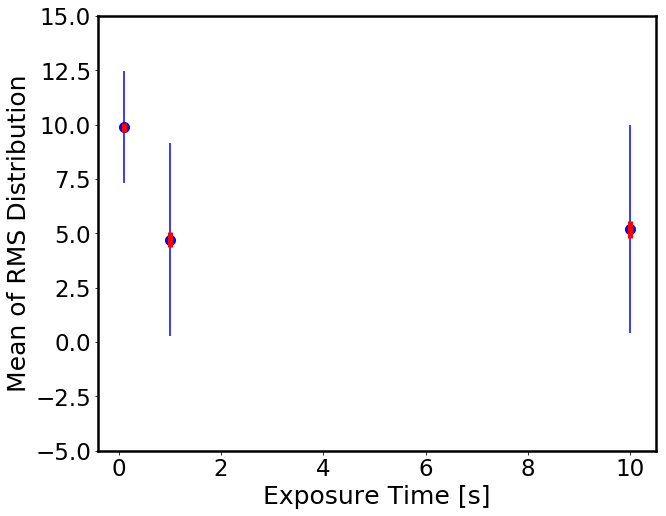

In [31]:
#rough plot to show if function of exposure time
plt.figure(figsize=(10,8))
plt.scatter([0.1, 1., 10.], [np.median(RMS_array), np.median(RMS1_array), np.median(RMS10_array)], c='b', s=100)
plt.errorbar([0.1, 1., 10.], [np.median(RMS_array), np.median(RMS1_array), np.median(RMS10_array)], yerr = [np.std(RMS_array), np.std(RMS1_array), np.std(RMS10_array)], color='b', ls='None')
#plt.scatter([0.1, 1., 10.], [np.median(RMS_array), np.median(RMS1_array), np.median(RMS10_array)], c='b', s=100)
plt.errorbar([0.1, 1., 10.], [np.median(RMS_array), np.median(RMS1_array), np.median(RMS10_array)], yerr = [RMS_aveuncertainty*100, RMS1_aveuncertainty*100, RMS10_aveuncertainty*100], color='r', ls='None', lw=5)


plt.xlabel('Exposure Time [s]', fontsize=25)
plt.ylabel('Mean of RMS Distribution', fontsize=25)
plt.ylim([-5, 15])
#plt.xscale('log')

In [28]:
RMS_aveuncertainty

0.0020691607392128125

Does not seem to be a function of exposure time

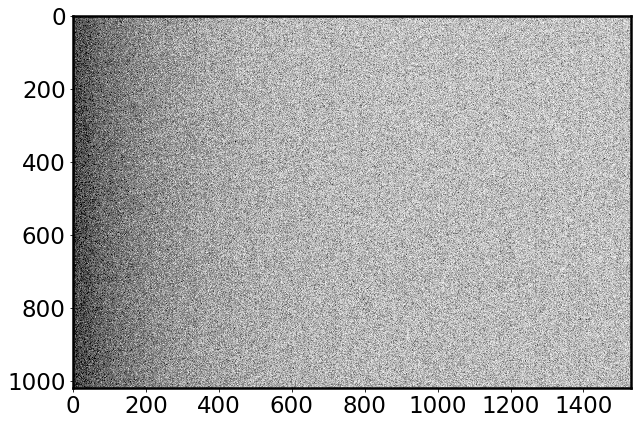

In [34]:
#light leak?
plt.figure(figsize=(10, 10))
norm = matplotlib.colors.Normalize(vmin=min(exp8[0]), vmax=max(exp8[0]))
plt.imshow(exp1, norm=norm, cmap='Greys')

In [35]:
#light leak?


exp_10s_lighttest = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF10_lighttest.FIT')[0].data #covered by box
exp_10s = fits.open('/Users/sidneylower/Documents/ObsTech CCD/DF10_1.FIT')[0].data #uncovered


Text(0.5,1,'Covered Exposure')

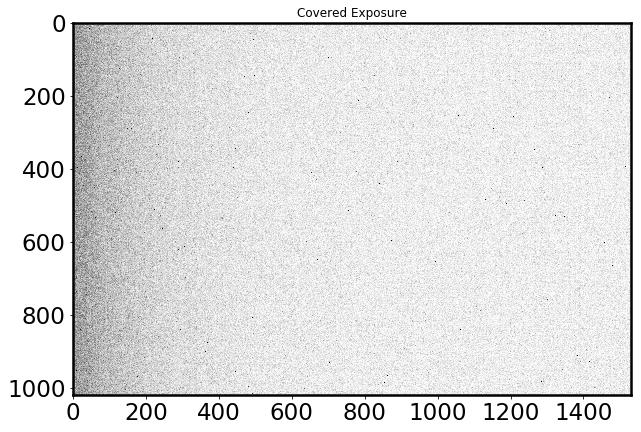

In [36]:
plt.figure(figsize=(10, 10))
Norm = matplotlib.colors.Normalize(vmin=min(exp_10s[0]), vmax=max(exp_10s[0]))
plt.imshow(exp_10s_lighttest, norm=Norm, cmap = 'Greys')
plt.title('Covered Exposure')

Text(0.5,1,'Uncovered Exposure')

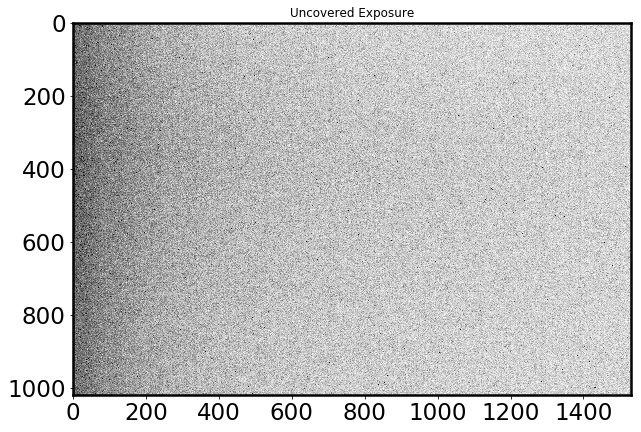

In [37]:
plt.figure(figsize=(10, 10))
plt.imshow(exp_10s, norm=Norm, cmap='Greys')
plt.title('Uncovered Exposure')

In [38]:
np.median(exp_10s), np.std(exp_10s)

(1040.0, 34.84021097327822)

In [39]:
np.median(exp_10s_lighttest), np.std(exp_10s_lighttest)

(1019.0, 33.828276947019376)

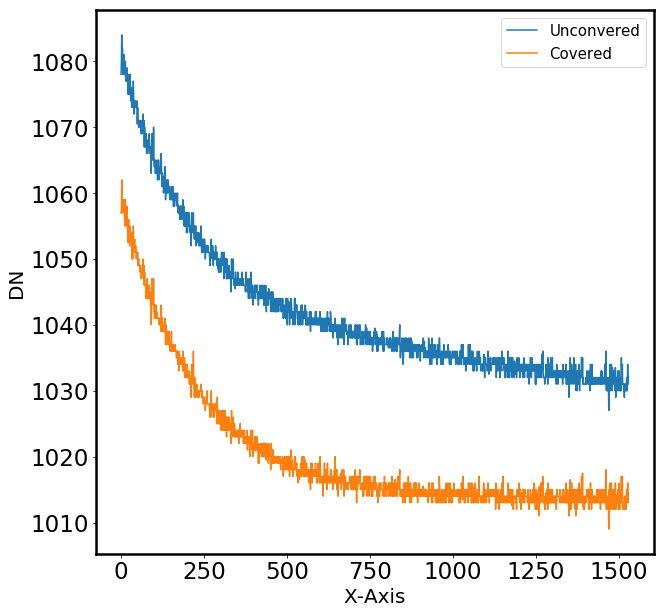

In [40]:
#y axis of ccd
plt.figure(figsize=(10,10))
plt.plot(np.median(exp_10s, axis=0), label='Unconvered')
plt.plot(np.median(exp_10s_lighttest, axis=0), label='Covered')
plt.xlabel('X-Axis', fontsize=20)
plt.ylabel('DN', fontsize=20)




plt.legend(loc='upper right', fontsize=15)

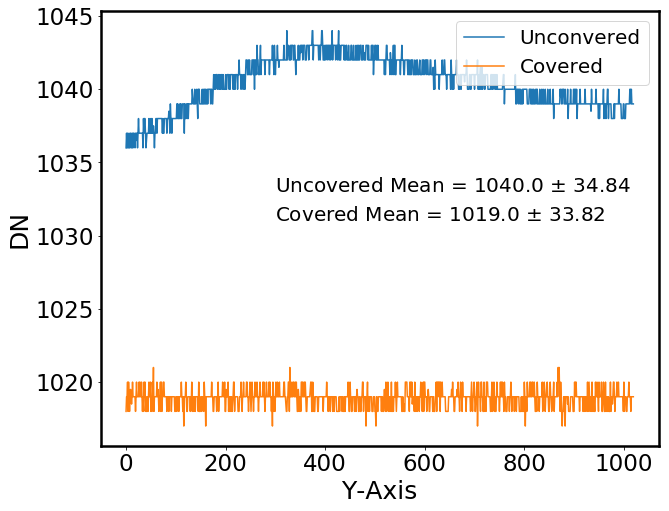

In [43]:
#x axis of CCD
plt.figure(figsize=(10,8))
plt.plot(np.median(exp_10s, axis=1), label='Unconvered')
plt.plot(np.median(exp_10s_lighttest, axis=1), label='Covered')
plt.xlabel('Y-Axis', fontsize=25)
plt.ylabel('DN', fontsize=25)


plt.annotate('Uncovered Mean = 1040.0 $\pm$ 34.84', xy=(300, 1033), fontsize=20)
plt.annotate('Covered Mean = 1019.0 $\pm$ 33.82 ', xy=(300, 1031), fontsize=20)

plt.legend(loc='upper right', fontsize=20)

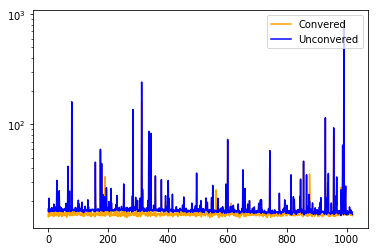

In [311]:
#X axis rms
plt.plot(np.std(exp_10s_lighttest, axis=1),c='orange',label='Convered')
plt.plot(np.std(exp_10s, axis=1),color='blue', label='Unconvered')
plt.yscale('log')
plt.legend(loc='upper right')

There is a difference but ~negligible? 